In [ ]:
import seaborn as sns

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from statsmodels.tsa.stattools import adfuller, acf, pacf
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.stats.diagnostic import acorr_ljungbox
import warnings
warnings.filterwarnings("ignore")

In [ ]:
np.random.seed(42)
dates = pd.date_range(start='2000Q1', periods=100, freq='Q')
ppi = np.random.normal(100, 10, 100).cumsum()  # Simulated PPI data
d_ppi = np.diff(ppi, n=1)  # First difference of PPI
d_ppi = np.append([np.nan], d_ppi)  # Align length with ppi
data = pd.DataFrame({'t': dates, 'ppi': ppi, 'd.ppi': d_ppi})
data.set_index('t', inplace=True)

In [ ]:
#global variables
y = 'ppi'
x = 'd.ppi'
time = 't'
lags = 40

In [ ]:
print("Description of PPI:")
print(data['ppi'].describe())

Description of PPI:
count     100.000000
mean     4985.948175
std      2864.129642
min       104.967142
25%      2534.954905
50%      4938.883467
75%      7440.841294
max      9896.153483
Name: ppi, dtype: float64


In [ ]:
data.index = pd.date_range(start=data.index[0], periods=len(data), freq='Q')
data['gen_time'] = np.arange(1, len(data) + 1)

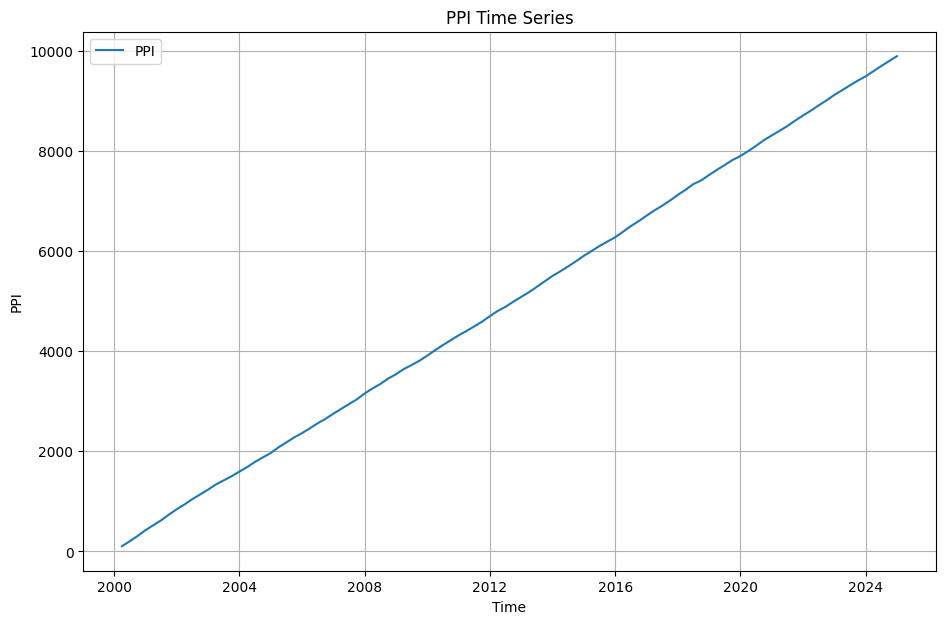

In [ ]:
#plot
plt.figure(figsize=(11, 7))
plt.plot(data.index, data['ppi'], label='PPI')
plt.title('PPI Time Series')
plt.xlabel('Time')
plt.ylabel('PPI')
plt.grid(True)
plt.legend()
plt.show()

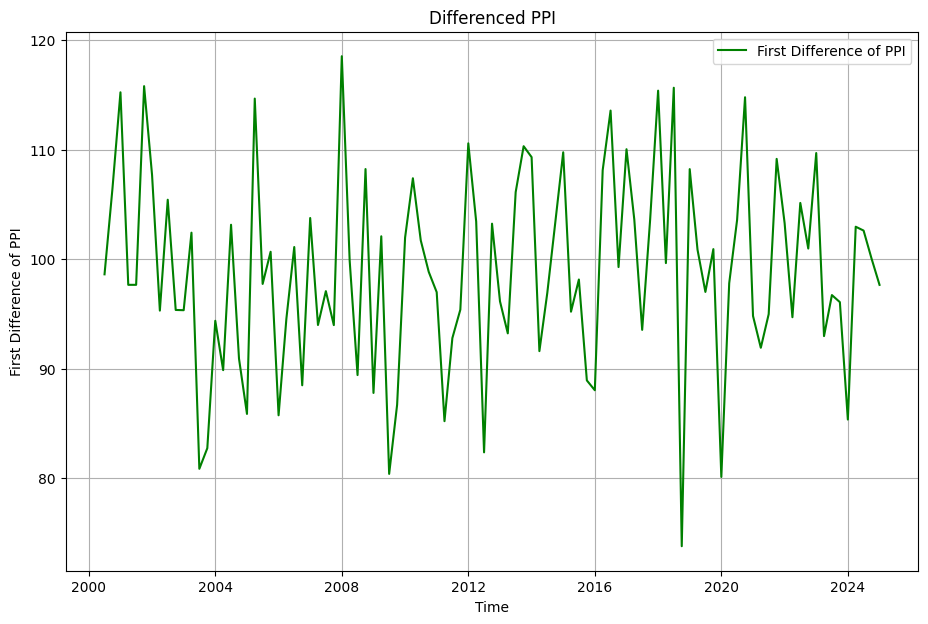

In [ ]:
#plot differenced ppi
plt.figure(figsize=(11, 7))
plt.plot(data.index, data['d.ppi'], label='First Difference of PPI', color ='Green')
plt.title('Differenced PPI')
plt.xlabel('Time')
plt.ylabel('First Difference of PPI')
plt.grid(True)
plt.legend()

In [ ]:
#dickey fuller test
adf_results = adfuller(data['ppi'].dropna(), maxlag=1, regression='c')
print("Augmented Dickey Fuller:", adf_results)

Augmented Dickey Fuller: (np.float64(0.5474803608390182), np.float64(0.9862469704962941), 0, 99, {'1%': np.float64(-3.498198082189098), '5%': np.float64(-2.891208211860468), '10%': np.float64(-2.5825959973472097)}, np.float64(714.7889813136212))


In [ ]:
print("\nDickey-Fuller Test for PPI:")
print(f"ADF Statistic: {adf_results[0]}")


Dickey-Fuller Test for PPI:
ADF Statistic: 0.5474803608390182


In [ ]:
print(f"p-value: {adf_results[1]}")
print(f"Critical Values: {adf_results[4]}")

p-value: 0.9862469704962941
Critical Values: {'1%': np.float64(-3.498198082189098), '5%': np.float64(-2.891208211860468), '10%': np.float64(-2.5825959973472097)}



Correlogram for PPI (Ljung-Box test):
        lb_stat      lb_pvalue
40  1232.309843  2.187315e-232


<Figure size 1000x400 with 0 Axes>

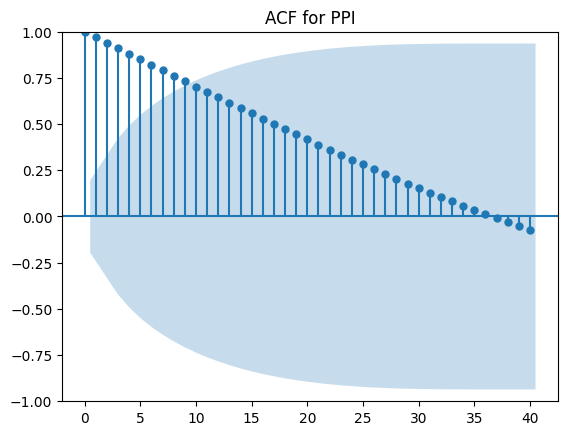

<Figure size 1000x400 with 0 Axes>

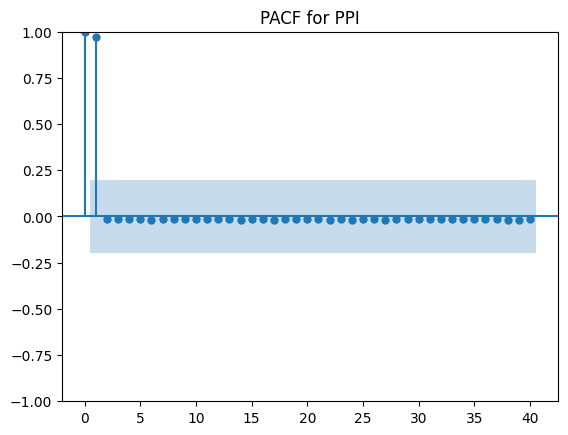

In [ ]:
print("\nCorrelogram for PPI (Ljung-Box test):")
lb_test_ppi = acorr_ljungbox(data['ppi'].dropna(), lags=[lags], return_df=True)
print(lb_test_ppi)

plt.figure(figsize=(10, 4))
plot_acf(data['ppi'].dropna(), lags=lags, title='ACF for PPI')
plt.show()

plt.figure(figsize=(10, 4))
plot_pacf(data['ppi'].dropna(), lags=lags, title='PACF for PPI')
plt.show()

In [ ]:
arima_models = [
    ((1, 1, 0), "ARIMA(1,1,0)"),
    ((0, 1, 1), "ARIMA(0,1,1)"),
    ((1, 1, 1), "ARIMA(1,1,1)")
]

In [ ]:
for order, model_name in arima_models:
    print(f"\nFitting {model_name}:")
    model = ARIMA(data['ppi'].dropna(), order=order)
    results = model.fit()
    print(results.summary())
    print(f"AIC: {results.aic}")
    print(f"BIC: {results.bic}")


Fitting ARIMA(1,1,0):
                               SARIMAX Results                                
Dep. Variable:                    ppi   No. Observations:                  100
Model:                 ARIMA(1, 1, 0)   Log Likelihood                -396.328
Date:                Thu, 05 Jun 2025   AIC                            796.656
Time:                        09:43:38   BIC                            801.847
Sample:                    03-31-2000   HQIC                           798.756
                         - 12-31-2024                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.9913      0.013     74.455      0.000       0.965       1.017
sigma2       168.6803     23.606      7.146      0.000     122.414     214.947
Ljung-Box (L1) (Q):          

In [ ]:
forecast_results = []

In [ ]:
np.random.seed(42)
dates = pd.date_range(start='2000Q1', periods=100, freq='Q')
ppi = np.random.normal(100, 10, 100).cumsum()  # Simulated PPI data
data = pd.DataFrame({'t': dates, 'ppi': ppi})
data.set_index('t', inplace=True)

# Define the number of quarters to forecast
forecast_quarters = 12

In [ ]:
for order, model_name in arima_models:
  print(F"\nFitting and forecasting for {model_name}:")
  model = ARIMA(data['ppi'].dropna(), order=order)
  results = model.fit()

    # Forecast for the next 12 quarters
  forecast_obj = results.get_forecast(steps=forecast_quarters)
  forecast_mean = forecast_obj.predicted_mean
  forecast_ci = forecast_obj.conf_int(alpha=0.05)  # 95% confidence intervals

    # Create forecast index (extend the quarterly index)
  last_date = data.index[-1]
  forecast_index = pd.date_range(start=last_date + pd.offsets.QuarterEnd(1),
                                  periods=forecast_quarters, freq='Q')


Fitting and forecasting for ARIMA(1,1,0):

Fitting and forecasting for ARIMA(0,1,1):

Fitting and forecasting for ARIMA(1,1,1):


In [ ]:
forecast_df = pd.DataFrame({
        'forecast': forecast_mean,
        'lower_ci': forecast_ci.iloc[:, 0],
        'upper_ci': forecast_ci.iloc[:, 1]
    }, index=forecast_index)

forecast_results.append((model_name, forecast_df))


In [ ]:
print(f"\nForecast for {model_name} (next {forecast_quarters} quarters):")
print(forecast_df)


Forecast for ARIMA(1,1,1) (next 12 quarters):
                forecast      lower_ci      upper_ci
2025-03-31   9995.049988   9977.083632  10013.016343
2025-06-30  10093.946491  10068.409344  10119.483637
2025-09-30  10192.842991  10161.409393  10224.276589
2025-12-31  10291.739489  10255.262526  10328.216453
2026-03-31  10390.635985  10349.652542  10431.619429
2026-06-30  10489.532479  10444.418229  10534.646729
2026-09-30  10588.428971  10539.464382  10637.393560
2026-12-31  10687.325460  10634.729336  10739.921583
2027-03-31  10786.221947  10730.170519  10842.273375
2027-06-30  10885.118432  10825.757120  10944.479743
2027-09-30  10984.014914  10921.466023  11046.563805
2027-12-31  11082.911394  11017.279381  11148.543408


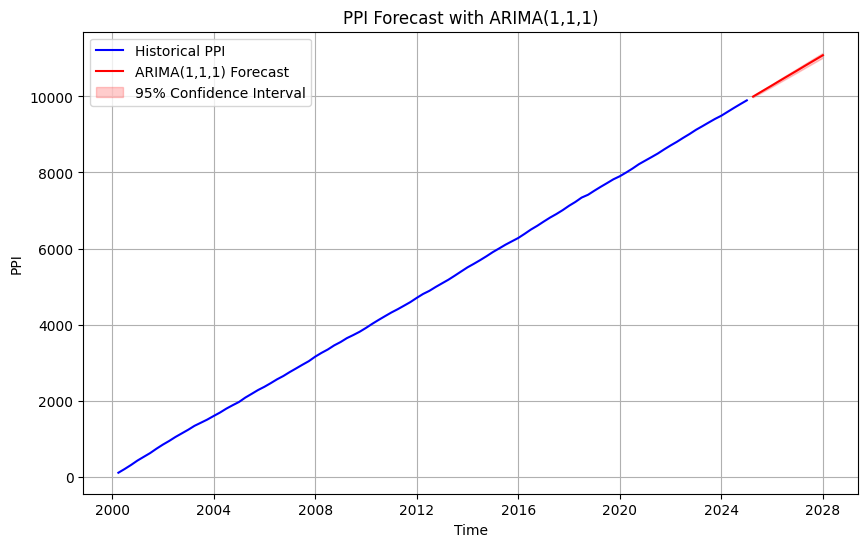

In [ ]:
# Plot historical data and forecast
plt.figure(figsize=(10, 6))
    # Plot historical PPI
plt.plot(data.index, data['ppi'], label='Historical PPI', color='blue')
    # Plot forecast
plt.plot(forecast_df.index, forecast_df['forecast'], label=f'{model_name} Forecast', color='red')
    # Plot confidence intervals
plt.fill_between(forecast_df.index,
                     forecast_df['lower_ci'],
                     forecast_df['upper_ci'],
                     color='red', alpha=0.2, label='95% Confidence Interval')
plt.title(f'PPI Forecast with {model_name}')
plt.xlabel('Time')
plt.ylabel('PPI')
plt.legend()
plt.grid(True)
plt.show()

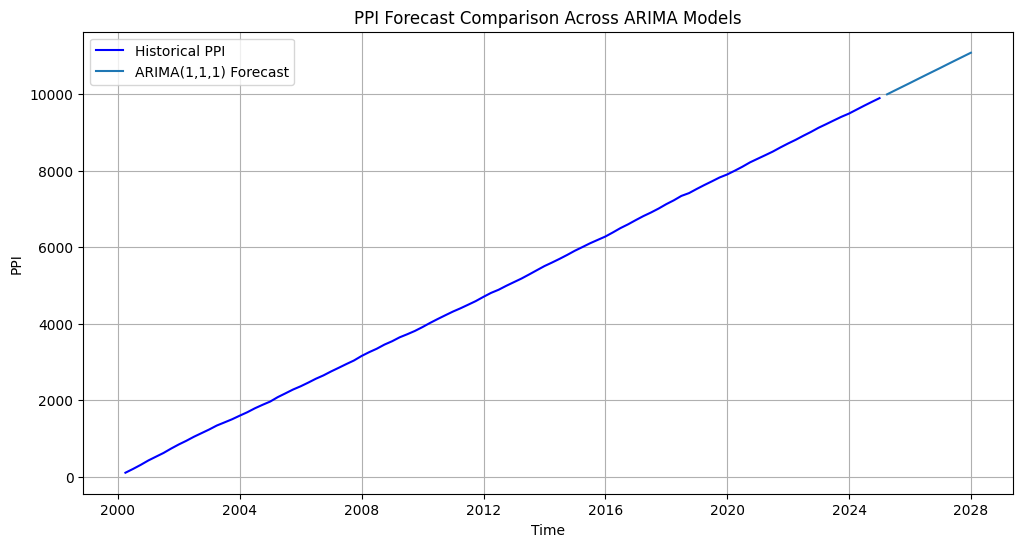

In [ ]:
plt.figure(figsize=(12, 6))
plt.plot(data.index, data['ppi'], label='Historical PPI', color='blue')
for model_name, forecast_df in forecast_results:
    plt.plot(forecast_df.index, forecast_df['forecast'], label=f'{model_name} Forecast')
plt.title('PPI Forecast Comparison Across ARIMA Models')
plt.xlabel('Time')
plt.ylabel('PPI')
plt.legend()
plt.grid(True)
plt.show()